# SYDE 556/750 --- Assignment 2
**Student ID: 00000000**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_02/syde556_assignment_02.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Generating a random input signal

## 1.1 Band-limited white noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with $\texttt{limit}$ at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

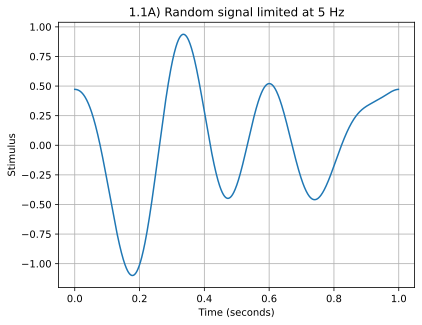

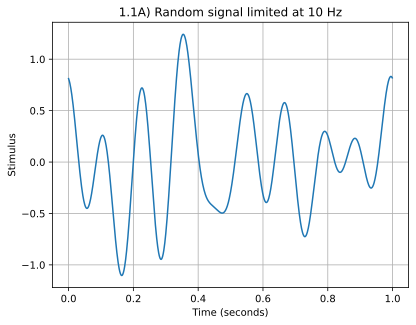

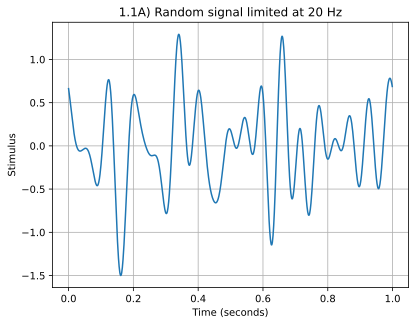

In [2]:
# Student ID: 20838709

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def generate_signal(T, dt, power_desired, limit_hz, seed):
    
    np.random.seed(seed)
    
    limit_rads = limit_hz * 2 * np.pi
    
    N = int(T / dt)
    x = np.linspace(0, T, N, endpoint=False)
    
    X_w = np.zeros((N,), dtype=complex)
    X_w[0] = np.random.normal(0, 1) + 1j*np.random.normal(0, 1) # Set 0 frequency
    xf_rads = fftfreq(N, dt) * 2 * np.pi # Gives frequency at each index

    for freq_idx in range(1, len(X_w)//2):    
        if xf_rads[freq_idx] < limit_rads: # Only generate signals for frequencies that are below the band limit
            signal = np.random.normal(0, 1) + 1j*np.random.normal(0, 1)
            # Each index of X_w represents a frequency to be fed into
            # ifft, in radians/second, NOT hz.
            X_w[freq_idx] = signal
            X_w[-freq_idx] = np.conjugate(signal) # Set the negative frequency too, ifft needs the pos and neg frequency
            
    y = np.real(np.fft.ifft(X_w))
    
    #power = np.sqrt(np.mean(y**2))

    scaling_factor = power_desired / np.sqrt(np.sum(y**2) / N)
    #print("Scaling factor", scaling_factor)
    #scaling_factor = power_desired / np.sqrt(np.sum(X_w**2) / N)
    #print("Scaling factor", scaling_factor)
    
    y = y * scaling_factor
    
    power = np.sqrt(np.mean(y**2))

    
    X_w = X_w * scaling_factor
    
    
    
    return x, y, xf_rads, X_w
    
    

"""
# FFT test
N = 600 # number of samples
T = 1.0 / 800.0 # sample spacing, each samples is 1/800th of a unit away from other samples (unit is seconds?)
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(5 * 2.0*np.pi*x) + 0.5*np.sin(8 * 2.0*np.pi*x) # Frequency is in rotations / second.
yf = fft(y) # Gives magnitude and offset of each frequency?
xf = fftfreq(N, T) # Gives frequency at each index of yf?
plt.plot(xf[:N//2], 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

# IFFT test

# Feed in the whole hog, positive and negative frequencies. 
# Gives back number of estimates equal to the number of frequencies fed in.
y_est = np.fft.ifft(yf) 
plt.plot(x, y_est, label="estimate")
plt.plot(x, y, label="original")
plt.legend()
plt.grid()
plt.show()
"""

if __name__ == "__main__":
    #1A) 
    
    T = 1
    dt = 1 / 1000
    N = int(T/dt)
    power_desired = 0.5
    seed = 18
    
    for limit_hz in [5, 10, 20]:
    
        x, y, xf_rads, X_w = generate_signal(T, dt, power_desired, limit_hz, seed)
    
        plt.grid()
        plt.plot(x, y)
        plt.xlabel("Time (seconds)")
        plt.ylabel("Stimulus")
        plt.title("1.1A) Random signal limited at " + str(limit_hz) + " Hz")
        plt.show()

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=10\,\mathrm{Hz}$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

C:\Users\Keena\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 120596 (\N{MATHEMATICAL ITALIC SMALL OMEGA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


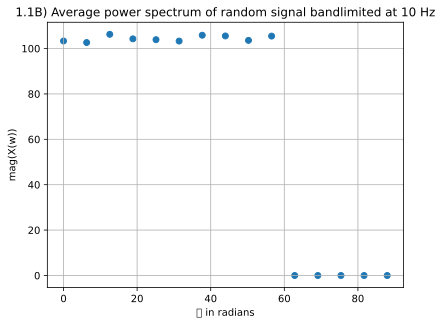

In [3]:
#1B)

limit_hz = 10


summed_Xws = np.zeros(N, dtype=complex)

for i in range(1000):

    x, y, xf_rads, X_w = generate_signal(T, dt, power_desired, limit_hz, seed + i)

    summed_Xws += np.abs(X_w)

mean_Xws = summed_Xws / 1000
plot_lim = int(limit_hz + 5)

plt.scatter(xf_rads[:plot_lim], np.abs(mean_Xws[0:plot_lim]))
plt.grid()
plt.xlabel("w in radians")
plt.ylabel("mag(X(w))")
plt.title("1.1B) Average power spectrum of random signal bandlimited at 10 Hz")
plt.show()

## 1.2 Gaussian power spectrum noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with `bandwidth` at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

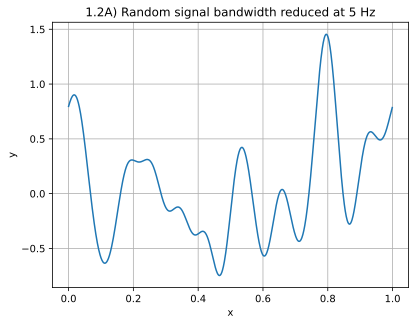

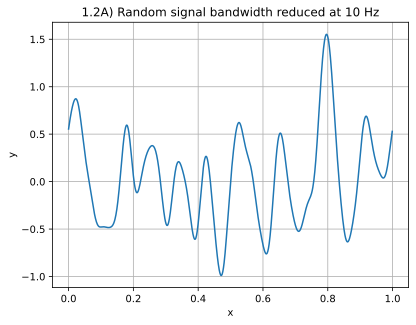

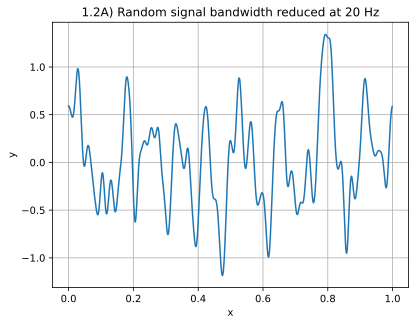

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from math import exp

def generate_signal_band_reduced(T, dt, power_desired, bw_hz, seed):
    
    np.random.seed(seed)
    
    bw_rads = bw_hz * np.pi * 2
    
    N = int(T / dt)
    x = np.linspace(0, T, N, endpoint=False)
    
    X_w = np.zeros((N,), dtype=complex)
    freq = 0
    stdev = exp((-freq * freq) / (2 * bw_rads * bw_rads))
    X_w[0] = np.random.normal(0, stdev) + 1j*np.random.normal(0, stdev) # Set 0 frequency
    xf_rads = fftfreq(N, dt) * 2 * np.pi # Gives frequency at each index

    for freq_idx in range(1, len(X_w)//2):    
        freq = xf_rads[freq_idx]
        stdev = exp((-freq * freq) / (2 * bw_rads * bw_rads))
        signal = np.random.normal(0, stdev) + 1j*np.random.normal(0, stdev)
        X_w[freq_idx] = signal
        X_w[-freq_idx] = np.conjugate(signal) # Set the negative frequency too, ifft needs the pos and neg frequency
            
    y = np.real(np.fft.ifft(X_w))

    scaling_factor = power_desired / np.sqrt(np.sum(y**2) / N)

    y = y * scaling_factor
    X_w = X_w * scaling_factor
    
    power = np.sqrt(np.mean(y**2))

    
    return x, y, xf_rads, X_w


#1.2A) 

T = 1
dt = 1 / 1000
N = int(T/dt)
power_desired = 0.5
seed = 18945
bw = 5

for bw_hz in [5, 10, 20]:

    x, y, xf_rads, X_w = generate_signal_band_reduced(T, dt, power_desired, bw_hz, seed)

    plt.grid()
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("1.2A) Random signal bandwidth reduced at " + str(bw_hz) + " Hz")
    plt.show()

    


**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{bandwidth}=10$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

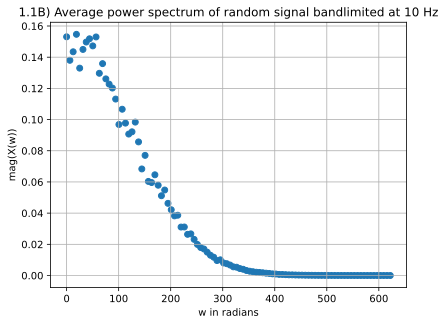

In [5]:
#1.2B)
bw_hz = 20

summed_Xws = np.zeros(N, dtype=complex)

for i in range(100):
    
    x, y, xf_rads, X_w = generate_signal_band_reduced(T, dt, power_desired, bw_hz, seed + i)
    
    summed_Xws += np.abs(X_w)
    
mean_Xws = summed_Xws / 100

plt.scatter(xf_rads[:N//2][0:100], 2.0/N * np.abs(mean_Xws[0:N//2])[0:100])
plt.grid()
plt.xlabel("w in radians")
plt.ylabel("mag(X(w))")
plt.title("1.1B) Average power spectrum of random signal bandlimited at 10 Hz")
plt.show()

# 2. Simulating a spiking neuron

**a) Spike plots for constant inputs.** Plot the spike output for a constant input of $x=0$ over $1$ second. Report the number of spikes. Do the same thing for $x=1$. Use a time step of $\Delta t = 1\,\mathrm{ms}$ for the simulation.

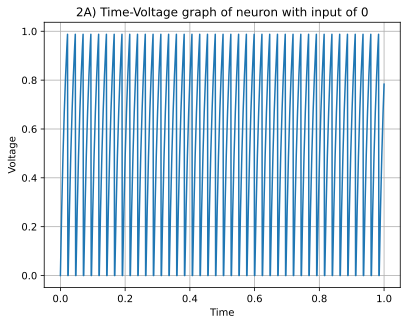

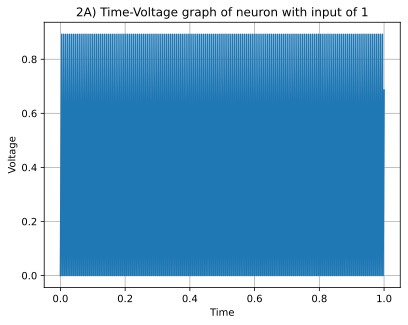

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from math import exp

alpha = 3.35
J_bias = 1.46
Trc = 20/1000
Tref = 2/1000
Vth = 1

#2A)

dt = 1 / 1000
T = 1
N = int(T / dt)

x_linspace = np.linspace(0, T, N)

for x in [0, 1]:

    v = 0
    voltages = []
    i = 0
    
    while i < len(x_linspace):
        if v >= Vth:
            v = 0
            i += Tref * 1000 # Scaled to ms, since that is our step size here
            voltages.append(0)
            voltages.append(0)
        else:
            voltages.append(v)
            i += 1
            
        J = alpha * x + J_bias
        v += dt * (J - v) / Trc
            
    
    plt.grid()
    plt.plot(x_linspace, voltages)
    plt.ylabel("Voltage")
    plt.xlabel("Time")
    plt.title("2A) Time-Voltage graph of neuron with input of " + str(x))
    
    plt.show()





**b) Discussion.** Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$? Why or why not? What aspects of the simulation would affect this accuracy?

In [7]:
#2B)

B = """
Discussion:

Yes, the expected number of spikes matches the expected spikes for x = 0 and x = 1. This is to be expected, as the neuron
defined as having 40 spikes/s with 0 current and 150 spikes/s with 1 current. 

Step size in the simulation could affect the accuracy, since in the simulation the voltage can go over vth in the 
middle of a step, causing inaccuracy, whereas in a real neuron, as soon as vth is hit, the spike occurs. So a super
big step size could decrease the spike rate in simulation.

"""

print(B)




Discussion:

Yes, the expected number of spikes matches the expected spikes for x = 0 and x = 1. This is to be expected, as the neuron
defined as having 40 spikes/s with 0 current and 150 spikes/s with 1 current. 

Step size in the simulation could affect the accuracy, since in the simulation the voltage can go over vth in the 
middle of a step, causing inaccuracy, whereas in a real neuron, as soon as vth is hit, the spike occurs. So a super
big step size could decrease the spike rate in simulation.




✍ \<YOUR SOLUTION HERE\>

**c) Spike plots for white noise inputs.** Plot the spike output for $x(t)$ generated using your function from part 1.1. Use $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=30\,\mathrm{Hz}$. Overlay on this plot $x(t)$.

Power:  0.5


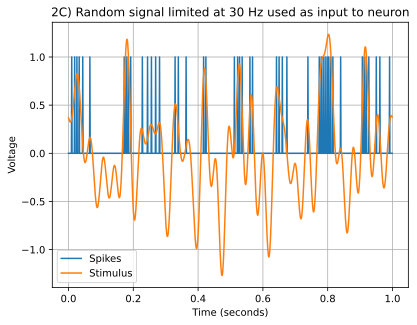

In [15]:
#2C)

limit = 30
power_desired = 0.5
T = 1
dt = 0.001
seed = 18945

times, currents, _, _ = generate_signal(T, dt, power_desired, limit, seed)

voltages = []
voltage_spikes = []
v = 0
i = 0
while i < len(times):
    
    if v >= Vth:
        v = 0
        i += Tref * 1000 # Scaled to ms, since that is our step size here
        voltages.append(0)
        voltages.append(0)
        voltage_spikes.append(1)
        voltage_spikes.append(0)
    else:
        voltages.append(v)
        voltage_spikes.append(0)
        i += 1
        
    if i < len(times):
        J = alpha * currents[int(i)] + J_bias
        v += dt * (J - v) / Trc



plt.grid()
plt.plot(times, voltage_spikes, label = "Spikes")
plt.plot(times, currents, label = "Stimulus")
plt.xlabel("Time (seconds)")
plt.ylabel("Voltage")
plt.title("2C) Random signal limited at " + str(limit) + " Hz used as input to neuron")
plt.legend()
plt.show()



**d) Voltage over time.** Using the same $x(t)$ signal as in part *c)*, plot the neuron's voltage over time for the first $0.2$ seconds, along with the spikes over the same time.

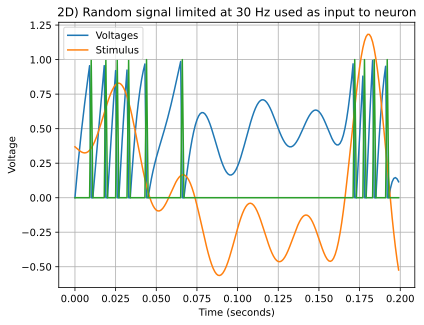

In [16]:
# 2D)

plt.grid()
plt.plot(times[0:200], voltages[0:200], label = "Voltages")
plt.plot(times[0:200], currents[0:200], label = "Stimulus")
plt.plot(times[0:200], voltage_spikes[0:200])
plt.xlabel("Time (seconds)")
plt.ylabel("Voltage")
plt.title("2D) Random signal limited at " + str(limit) + " Hz used as input to neuron")
plt.legend()
plt.show()




**e) 🌟 Bonus question.** How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time? $0.5$ marks for having a good idea. Up to $1$ mark for actually implementing it and showing that it works.

✍ \<YOUR SOLUTION HERE\>

In [10]:
#2E)

E = """
    How to improve the accuracy of the model matching the equation?
    
    This is a bit of a glib answer, but you could decrease the step size (yes, more computation),
    and use a more powerful computer, thus not increasing computation time.
    
    Alternatively, you could ditch the fixed step size of the LIF neuron, and
    make the step size a function of the last known slope, so when the curve is 
    steeper, use tighter steps, and when the curve is less steep, use larger steps.
    This would require extrapolation between discrete points of the input current
    for non-constant currents though, which would add some more computational overheard.
    The extrapolation computational requirements could be minimized by just using linear
    extrapolation, or just by generating a current that has a very small step, and using
    the nearest point in the current to whatever point is needed by the voltage equation.
    
"""

print(E)


    How to improve the accuracy of the model matching the equation?
    
    This is a bit of a glib answer, but you could decrease the step size (yes, more computation),
    and use a more powerful computer, thus not increasing computation time.
    
    Alternatively, you could ditch the fixed step size of the LIF neuron, and
    make the step size a function of the last known slope, so when the curve is 
    steeper, use tighter steps, and when the curve is less steep, use larger steps.
    This would require extrapolation between discrete points of the input current
    for non-constant currents though, which would add some more computational overheard.
    The extrapolation computational requirements could be minimized by just using linear
    extrapolation, or just by generating a current that has a very small step, and using
    the nearest point in the current to whatever point is needed by the voltage equation.
    



# 3. Simulating two spiking neurons

**a) Spike plots for constant inputs.** Plot $x(t)$ and the spiking output for $x(t)=0$ (both neurons should spike at about $40$ spikes per second), as well as (in a separate plot) $x(t)=1$ (one neuron should spike at $\approx 150$ spikes per second, and the other should not spike at all).

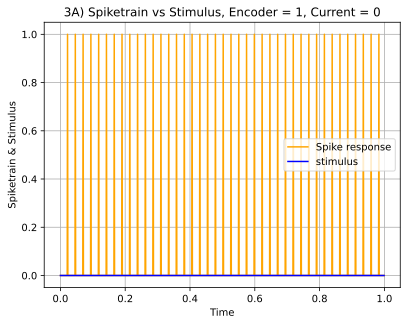

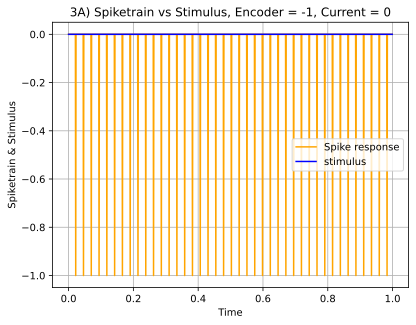

Spikes for negative encoder shown as -1, though are really +1


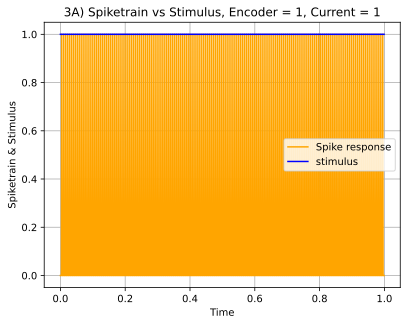

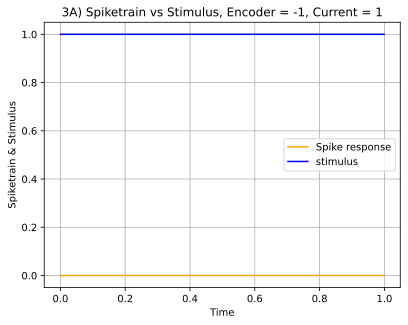

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from Q1_1 import generate_signal
from math import exp

def get_neuron_response_to_current(time, dt, current, encoder):
    Trc = 20/1000
    Tref = 2/1000
    
    x0 = 0
    a0 = 40
    x1 = 1
    a1 = 150
    
    J_bias = 1 / (1 - exp( (Tref - 1 / a0 ) / Trc))
    alpha = (1 / (1 - exp( (Tref - 1 / a1 ) / Trc)) - J_bias) / np.dot(1, x1)

    Vth = 1
    v = 0
    voltages = []
    spike_train = []
    i = 0

    while i < len(time):
        J = alpha * encoder * current[int(i)] + J_bias
        v += dt * (J - v) / Trc
        
        if v < 0: #Normalize any negative voltage to 0.
            v = 0

        if v >= Vth:
            v = 0
            spike_train.append(encoder)
            spike_train.append(0)
            
            ref_ms = Tref * 100
            j = 0
            while j < ref_ms:
                voltages.append(0)
                j += 1
                i += 1
            
        else: # No spike
            voltages.append(v)
            spike_train.append(0)
            i += 1
            
    return voltages[0:len(time)], spike_train[0:len(time)]
    
def plot_spikerate(time, spike_train, current, plt_lim, title):
    plt.grid()
    
    plt.plot(time[0:plt_lim], spike_train[0:plt_lim], label="Spike response", color='orange')
    plt.plot(time[0:plt_lim], current[0:plt_lim], label="stimulus", color='blue')
    
    plt.legend()
    plt.ylabel("Spiketrain & Stimulus")
    plt.xlabel("Time")
    plt.title(title)
    plt.show()

if __name__ == "__main__":
    
    dt = 1 / 1000
    T = 1
    N = int(T / dt)
    current = np.zeros(N)
    
    time = np.linspace(0, T, N)
    
    # 3A)
    
    voltages_pos_enc, spike_train = get_neuron_response_to_current(time, dt, current, 1)    
    plot_spikerate(time, spike_train, current, -1, "3A) Spiketrain vs Stimulus, Encoder = 1, Current = 0")
        
    voltages_neg_enc, spike_train = get_neuron_response_to_current(time, dt, current, -1)
    plot_spikerate(time, spike_train, current, -1, "3A) Spiketrain vs Stimulus, Encoder = -1, Current = 0")
    print("Spikes for negative encoder shown as -1, though are really +1")
    
    current += 1
    voltages_pos_enc, spike_train = get_neuron_response_to_current(time, dt, current, 1)        
    plot_spikerate(time, spike_train, current, -1, "3A) Spiketrain vs Stimulus, Encoder = 1, Current = 1")
     
    voltages_neg_enc, spike_train = get_neuron_response_to_current(time, dt, current, -1)
    plot_spikerate(time, spike_train, current, -1, "3A) Spiketrain vs Stimulus, Encoder = -1, Current = 1")
    
    
    

**b) Spike plots for a sinusodial input.** Plot $x(t)$ and the spiking output for $x(t)=\frac{1}2 \sin(10 \pi t)$.

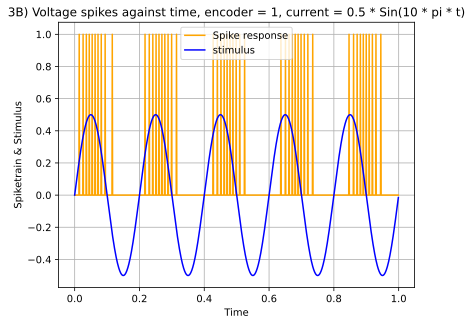

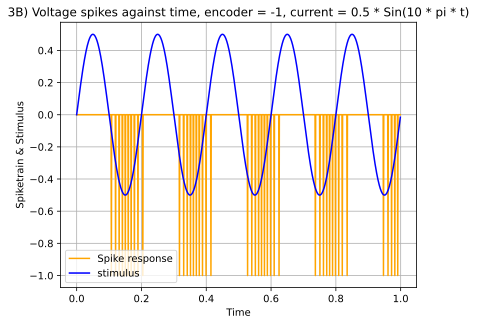

Spikes for negative neuorn shown as -1, though are really +1


In [23]:
# 3B)

current = 0.5 * np.sin(10 * np.pi * time)

voltages, spike_train = get_neuron_response_to_current(time, dt, current, 1)
plot_spikerate(time, spike_train, current, -1, "3B) Voltage spikes against time, encoder = 1, current = 0.5 * Sin(10 * pi * t)")

voltages, spike_train = get_neuron_response_to_current(time, dt, current, -1)
plot_spikerate(time, spike_train, current, -1, "3B) Voltage spikes against time, encoder = -1, current = 0.5 * Sin(10 * pi * t)")
print("Spikes for negative neuorn shown as -1, though are really +1")



**c) Spike plot for a white noise signal.** Plot $x(t)$ and the spiking output for a random signal generated with your function for question 1.1 with $\mathtt{T}=2\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=5\,\mathrm{Hz}$.

Power:  0.5000000000000001


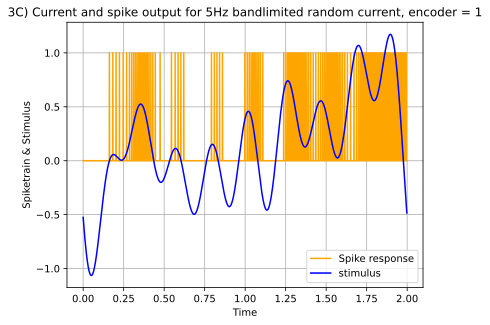

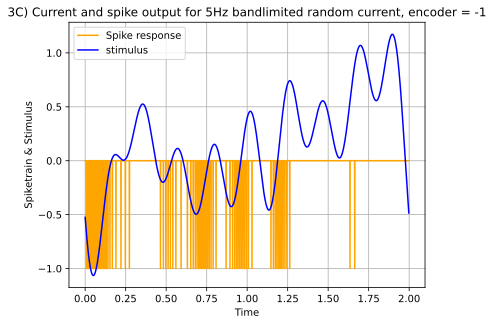

Spikes for negative neuron shown as -1, though are really +1


In [25]:

# 3C)

time, current, _, _ = generate_signal(T = 2, dt = 0.001, power_desired = 0.5, limit_hz = 5, seed = 1239945)

voltages, spike_train = get_neuron_response_to_current(time, dt, current, 1)
plot_spikerate(time, spike_train, current, -1, "3C) Current and spike output for 5Hz bandlimited random current, encoder = 1")

voltages, spike_train = get_neuron_response_to_current(time, dt, current, -1)
plot_spikerate(time, spike_train, current, -1, "3C) Current and spike output for 5Hz bandlimited random current, encoder = -1")
print("Spikes for negative neuron shown as -1, though are really +1")

# 4. Computing an optimal filter

**a) Document the code.** Fill in comments where there are `# !`-signs in the Python code. Make sure that your comments (where this makes sense) describe the semantics of the code and do not just repeat what is obvious from the code itself. Run the function with what you wrote for part 3 above, so that it uses the spike signal generated in 3c).

In [26]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 28 13:09:44 2023

@author: Keena
"""

import numpy as np
import matplotlib.pyplot as plt
from Q1_1 import generate_signal
from Q3 import get_neuron_response_to_current


def compute_optimal_filter(
        # Signal generated from your white noise generator
        x,
        # Fourier coefficients from your white noise generator
        X,
        # Spike train from the previous part
        spikes,
        # Time step size
        dt=1e-3
    ):

    # x and X should (effectively) be 1D-arrays
    assert x.ndim == 1 and X.ndim == 1
    assert x.shape[0] == X.shape[0]
    
    # Nt will represent the number of samples present in the current and spikes signal.
    Nt = x.size
    
    # Make sure that "spikes" is a 2 x Nt array
    assert spikes.ndim == 2
    assert spikes.shape[0] == 2              
    assert spikes.shape[1] == Nt
    
    # Optimal filter for 2 neurons (Page 9/18 on slides 4) is defined as: 
    # H(w) = X(w) * norm(R(w)) / Mag(R(w))^2.
    # H(w) is convolved with the spike trains, in an effort to make the spike trains
    # Better resemble the original input.
    
    # X(w) is the frequency components of the input signal.
    # R(w) is the frequency components of d * (a1 - a2), the decoded signal.
    # R(w) * H(w) should give a signal that best approximates X(w)
    
    # Time length of signal is number of samples multiplied by time length of each sample
    T = Nt * dt
    
    # Time series centered about t = 0, spanning number of samples, with step size dt.
    ts = np.arange(Nt) * dt - T / 2.0
    
    
    # Difference between spikerate of pos encoded neuron and neg encoded neuron.
    # Given that the negative spiketrain spikes down, this is effectively normalizing
    # Negative spikes to positive spikes and combining both spiketrains into
    # One summed spiketrain.
    r = spikes[0] - spikes[1]
    
    # Frequency representation of summed spiketrain. Probably has an interesting
    # Distribution since r is basically a bunch of impulse signals.
    R = np.fft.fftshift(np.fft.fft(r))
    
    # Setting up range of window function W2
    fs = np.arange(Nt) / T - Nt / (2.0 * T)
    
    # Tunable parameter for the window function W2.
    # Increasing sigma_t will cause the window to be tighter
    # Decreasing sigma_t will cause the window to be wider.
    sigma_t = 25e-3
    
    # Converting frequencies (in arbitrary Hz, cycles/second) to rotations per second.
    omega = fs * 2.0 * np.pi
    
    # Setup of window function to tune H. W2 is based on omega, which is based on fs, 
    # and fs is centered about 0, so this system is not causaul, and the window function
    # W2 will be symmetrically smoothing all datapoints in a convolution.
    # Since omega is linear and centered about 0, the window function will be
    # A gaussian centered about 0 as well.
    W2 = np.exp(-omega**2*sigma_t**2)
    
    # By normalizing W2 to 1, convolving with W2 will not scale the convolved function,
    # Just change its shape
    W2 = W2 / sum(W2)
    
    # This is the numerator of H, determined with the error minimization equation,
    # without convolution with the window function W2.
    # Note that since X was generated with specific signals, X(w) has a few very strong
    # Frequencies, and all other signals are effectively 0.
    CP = X * R.conjugate()
    
    # This is the numerator of H, including convolution with W2. So now the numerator
    # Has been smoothed by W2, the window function. This means that all frequencies
    # Will get atleast some representation, instead of just the handful of strong
    # Frequencies present in CP.
    WCP = np.convolve(CP, W2, 'same')
    
    # The denominator of H, without any smoothing. Since R is being multiplied by its
    # conjugate, strong frequencies will be scaled up much more than weak frequencies,
    # So some smoothing could be useful to generate a signal more realistic to nature.
    RP = R * R.conjugate()
    
    # The denominator of H, smoothed.
    WRP = np.convolve(RP, W2, 'same')
    
    # Magnitudes squared of the components of random current signal. Not used in H.
    XP = X * X.conjugate()
    
    # Convolution of random signal components and transformed frequency scale. Not used in H.
    # Will be used to compare the decoded filtered smoothed signal against.
    WXP = np.convolve(XP, W2, 'same')
    
    # Final step in creating filter H.
    H = WCP / WRP
    
    # Taking our filter out of fourier domain and back into real domain
    h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real
    
    # Convolve H with R, so that at each spike in R, an H is "spawned", best approximating
    # The original x stimulus.
    XHAT = H*R
    
    # This is just taking the difference in voltages back out of the fourier domain into the time domain
    xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real
    
    return ts, fs, R, H, h, XHAT, xhat, XP, WXP




**b) Optimal filter.** Plot the time and frequency plots of the optimal filter for the signal you generated in question 3c). Make sure to use appropriate limits for the $x$-axis.

Power:  0.49999999999999994


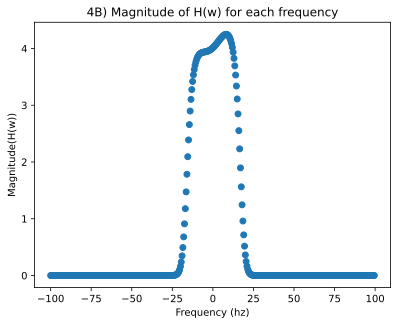

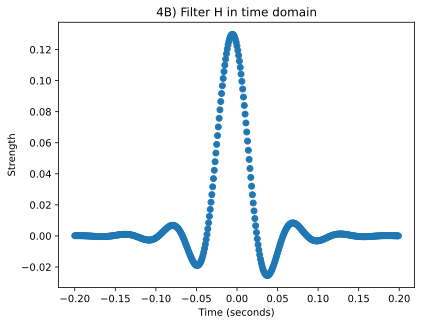

In [27]:
dt = 0.001

time, current, frequencies, components = generate_signal(T = 2, dt = dt, power_desired = 0.5, limit_hz = 5, seed = 1225)

voltages_pos_enc, pos_spiketrain = get_neuron_response_to_current(time, dt, current, 1)
voltages_neg_enc, neg_spiketrain = get_neuron_response_to_current(time, dt, current, -1)


x = current
X = components
X = np.roll(X, int(len(X)/2)) # This is necessary so that the frequencies of F line up with the frequencies of ts
frequencies = np.roll(frequencies, int(len(frequencies)/2)) # Just useful for comparing the frequencies of X_w to the frequencies expected by ts

spikes = np.array([
    pos_spiketrain, 
    -1 * np.array(neg_spiketrain)
])


ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(x, X, spikes, dt=1e-3)

#B)
B_plt_lim = 800
plt.scatter(fs[B_plt_lim:-B_plt_lim], abs(H)[B_plt_lim:-B_plt_lim])
plt.title("4B) Magnitude of H(w) for each frequency")
plt.xlabel("Frequency (hz)")
plt.ylabel("Magnitude(H(w))")
plt.show()

plt.scatter(ts[B_plt_lim:-B_plt_lim], h[B_plt_lim:-B_plt_lim])
plt.title("4B) Filter H in time domain")
plt.xlabel("Time (seconds)")
plt.ylabel("Strength")
plt.show()



**c) Decoded signal.** Plot the $x(t)$ signal, the spikes, and the decoded $\hat x(t)$ value for the signal from 3c).

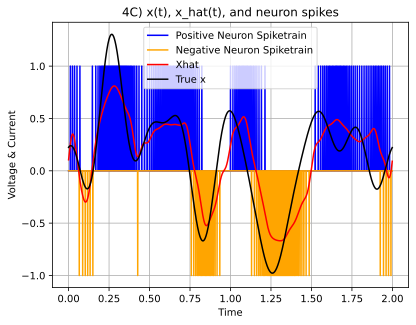

In [28]:
#C)
plt.plot(time, pos_spiketrain, color='blue', label="Positive Neuron Spiketrain")
plt.plot(time, neg_spiketrain, color='orange', label="Negative Neuron Spiketrain")
plt.plot(time, xhat, color='red', label="Xhat")
plt.plot(time, current, color='black', label="True x")
plt.legend()
plt.grid()
plt.xlabel("Time")
plt.ylabel("Voltage & Current")
plt.title("4C) x(t), x_hat(t), and neuron spikes")

plt.show()



**d) Power spectra.** Plot the signal $|X(\omega)|$, spike response $|R(\omega)|$, and filtered signal $|\hat X(\omega)|$ power spectra for the signal from 3c).

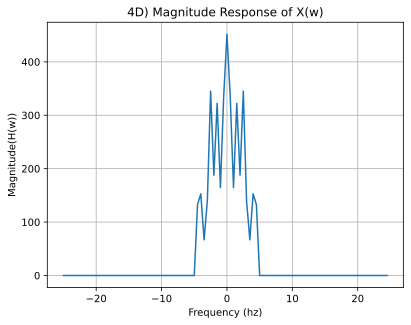

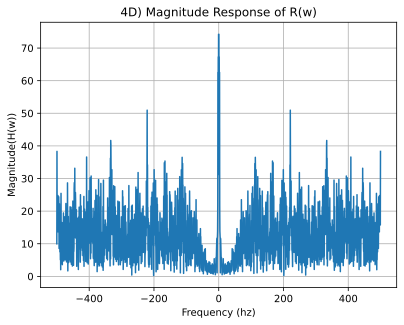

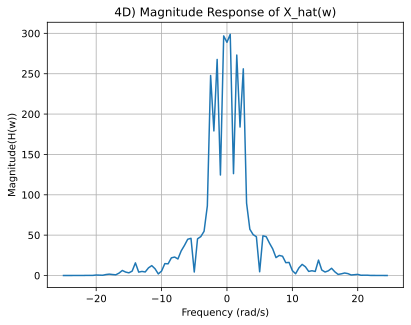

In [29]:
#D)

D_plot_lim = 950
plt.plot(fs[D_plot_lim:-D_plot_lim], abs(X)[D_plot_lim:-D_plot_lim])
plt.title("4D) Magnitude Response of X(w)")
plt.xlabel("Frequency (hz)")
plt.ylabel("Magnitude(H(w))")
plt.grid()
plt.show()

plt.plot(fs, abs(R))
plt.title("4D) Magnitude Response of R(w)")
plt.xlabel("Frequency (hz)")
plt.ylabel("Magnitude(H(w))")
plt.grid()
plt.show()

plt.plot(fs[D_plot_lim:-D_plot_lim], abs(XHAT)[D_plot_lim:-D_plot_lim])
plt.title("4D) Magnitude Response of X_hat(w)")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Magnitude(H(w))")
plt.grid()
plt.show()



**e) Discussion.** How do these spectra relate to the optimal filter?

In [30]:
#4E)

discussion = """
How do these spectra relate to the optimal filter?

R(w) is the frequency representation spiking output of the filters. R(w) looks
nothing like X(w), the true stimulus. Once filtering is applied to R(w),
the resultant X_hat(W) looks much more like X(w).

The most noteworthy difference between X(w) and X_hat(w) is that X_hat(w) does
not have the same 5hz cutoff, so it has some lower-powered frequencies extending
past the cutoff point, and X_hat(w)'s lower frequencies dont have quite the same magnitude
that X(w)'s lower frequencies do.

"""

print(discussion)




How do these spectra relate to the optimal filter?

R(w) is the frequency representation spiking output of the filters. R(w) looks
nothing like X(w), the true stimulus. Once filtering is applied to R(w),
the resultant X_hat(W) looks much more like X(w).

The most noteworthy difference between X(w) and X_hat(w) is that X_hat(w) does
not have the same 5hz cutoff, so it has some lower-powered frequencies extending
past the cutoff point, and X_hat(w)'s lower frequencies dont have quite the same magnitude
that X(w)'s lower frequencies do.




✍ \<YOUR SOLUTION HERE\>

**f) Filter for different signal bandwidths.** Plot the optmial filter $h(t)$ in the time domain when filtering spike trains for white noise signals with different `limit` values of $2\,\mathrm{Hz}$, $10\,\mathrm{Hz}$, and $30\,\mathrm{Hz}$.

Power:  0.49999999999999994


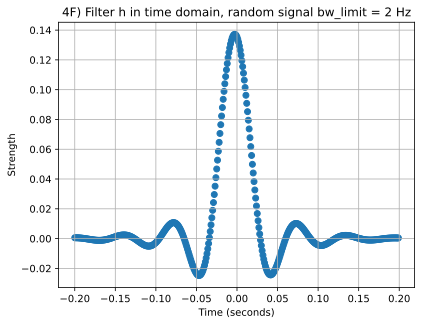

Power:  0.5


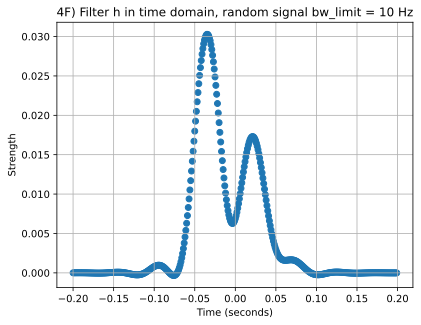

Power:  0.5


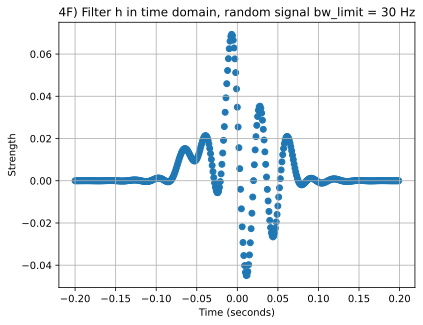

In [31]:
#4F)

for limit_hz_ in [2, 10, 30]:
    
    time, current, frequencies, components = generate_signal(T = 2, dt = dt, power_desired = 0.5, limit_hz = limit_hz_, seed = 1225)

    voltages_pos_enc, pos_spiketrain = get_neuron_response_to_current(time, dt, current, 1)
    voltages_neg_enc, neg_spiketrain = get_neuron_response_to_current(time, dt, current, -1)


    x = current
    X = components
    X = np.roll(X, int(len(X)/2)) # This is necessary so that the frequencies of F line up with the frequencies of ts
    frequencies = np.roll(frequencies, int(len(frequencies)/2)) # Just useful for comparing the frequencies of X_w to the frequencies expected by ts

    spikes = np.array([
        pos_spiketrain, 
        -1 * np.array(neg_spiketrain)
    ])


    ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(x, X, spikes, dt=1e-3)
    
    plt.scatter(ts[B_plt_lim:-B_plt_lim], h[B_plt_lim:-B_plt_lim])
    plt.title("4F) Filter h in time domain, random signal bw_limit = " + str(limit_hz_) + " Hz")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Strength")
    plt.grid()
    plt.show()



**g) Discussion.** Describe the effects on the time plot of the optimal filter as `limit` increases. Why does this happen?

In [32]:
# G

discussion_G = """
    As the bandwidth of the random signal increases, more high-frequency components are allowed into
    the signal. To accomodate the increase in rapid spikes, the filter itself must have more
    high-frequency components, hence the increase in spikes in the time representation of the 
    filter.
"""

print(discussion_G)


    As the bandwidth of the random signal increases, more high-frequency components are allowed into
    the signal. To accomodate the increase in rapid spikes, the filter itself must have more
    high-frequency components, hence the increase in spikes in the time representation of the 
    filter.



✍ \<YOUR SOLUTION HERE\>

# Using post-synaptic currents as a filter


**a) Plotting the filter for different $n$.** Plot the normalized $h(t)$ for $n=0$, $1$, and $2$, with $\tau=7\,\mathrm{ms}$.

Power:  0.49999999999999994
1.0000000000000002
0.9999999999999999
0.9999999999999998


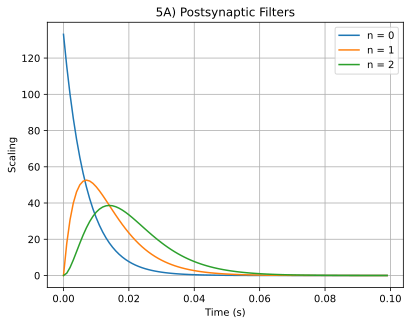

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from Q1_1 import generate_signal
from Q3 import get_neuron_response_to_current, plot_spikerate
from math import exp

def get_h_of_t(time, n, T, dt):
    
    h_t = []
    
    c = np.sum(pow(time, n) * np.exp(-time/T)) * dt
    
    for t in time:
        
        if t < 0:
            h_t.append(0)
            
        else:
            h = pow(t, n) * exp(-t/T) / c
            h_t.append(h)    
            
    print(np.sum(h_t) * dt)
            
    return h_t


dt = 0.001

time, stimulus, frequencies, components = generate_signal(T = 2, dt = dt, power_desired = 0.5, limit_hz = 5, seed = 12345)

voltages_pos_enc, pos_spiketrains = get_neuron_response_to_current(time, dt, stimulus, 1)
voltages_neg_enc, neg_spiketrains = get_neuron_response_to_current(time, dt, stimulus, -1)
neg_spiketrains = -1 * np.array(neg_spiketrains)

#5A)
for n in [0, 1, 2]:
    h_t = get_h_of_t(time, n, 0.007, dt)
    plt.plot(time[0:100], h_t[0:100], label="n = " + str(n))
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Scaling")
plt.title("5A) Postsynaptic Filters")
#plt.ylim([0, 0.15])
plt.legend()
plt.show()

**b) Discussion.** What two things do you expect increasing $n$ will do to $\hat{x}(t)$?

In [ ]:
#5B)

discussion = """
    By increasing n, the filter is more spread out, and since its area is
    normalized to 1, it is shorter as well. This makes it a lower-pass filter
    the larger n is.
    
    Increasing n also pushes the filter further ahead in time, which
    means it will cause a delay to any function it convolves.
"""

#print(discussion)



✍ \<YOUR SOLUTION HERE\>

**c) Plotting the filter for different $\tau$.** Plot the normalized $h(t)$ for $\tau=2\,\mathrm{ms}$, $\tau=5\,\mathrm{ms}$, $\tau=10\,\mathrm{ms}$, $\tau=20\,\mathrm{ms}$ with $n = 0$.

1.0
0.9999999999999999
1.0000000000000002
0.9999999999999998


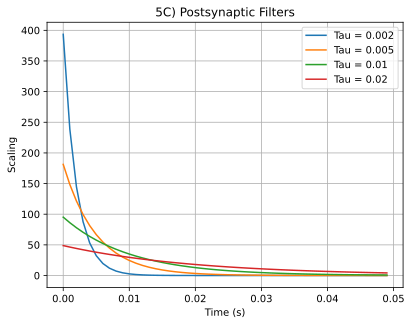

In [34]:
#5C)
for T in [0.002, 0.005, 0.01, 0.02]:
    h_t = get_h_of_t(time, 0, T, dt)
    plt.plot(time[0:50], h_t[0:50], label="Tau = " + str(T))
    
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Scaling")
plt.title("5C) Postsynaptic Filters")
plt.legend()
plt.show()

**d) Discussion.** What two things do you expect increasing $\tau$ will do to $\hat{x}(t)$?

In [ ]:
#5D)

discussion = """
    By increasing Tau, the filter is made more horizontal. Since the filter
    magnitude is normalized to 1, this means future values are given more
    and more weight, the greater Tau is, which increases lag in the system.
    
    This is similar behaviour to increasing n, except there is no emergent
    symmetric lump like when increasing n, just flatter and flatter curves
    that reach further and further into the future.
    
"""

#print(discussion)




✍ \<YOUR SOLUTION HERE\>

**e) Decoding a spike-train using the post-synaptic current filter.** Decode $\hat{x}(t)$ from the spikes generated in question 3c) using an $h(t)$ with $n=0$ and $\tau=7\,\mathrm{ms}$. Do this by generating the spikes, filtering them with $h(t)$, and using that as your activity matrix $A$ to compute your decoders. Plot the time and frequency plots for this $h(t)$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

1.0000000000000002


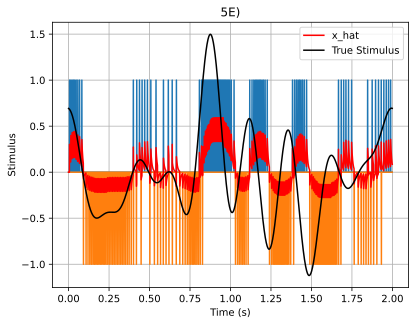

In [35]:
h = get_h_of_t(time, n=0, T=0.007, dt = dt)



A = np.zeros((2, len(pos_spiketrains)))

for i in range(len(pos_spiketrains)):
    
    if pos_spiketrains[i]:
        
        A[0, i:] += pos_spiketrains[i] * np.array(h[0: len(A[0]) - i])
        
    if neg_spiketrains[i]:
        
        A[1, i:] += neg_spiketrains[i] * np.array(h[0: len(A[1]) - i])

A = np.matrix(A)

decoders = np.linalg.inv(A * A.T) * A * np.matrix(stimulus).T

decoders = decoders.T

x_hat = decoders * A



plt.plot(time, pos_spiketrains)
plt.plot(time, -neg_spiketrains)     
plt.plot(time, x_hat.T, color='red', label="x_hat")
plt.plot(time, stimulus, color='black', label="True Stimulus")

plt.legend()
plt.grid()
plt.title("5E)")
plt.xlabel("Time (s)")
plt.ylabel("Stimulus")
plt.show()


**f) Deocding a spike-train representing a low-frequency signal.** Use the same decoder and $h(t)$ as in part e), but generate a new $x(t)$ with $\mathtt{limit}=2\,\mathrm{Hz}$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

Power:  0.5
1.0000000000000002


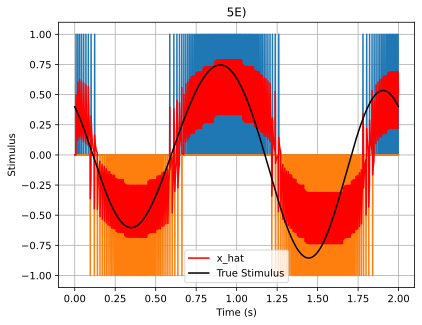

In [36]:
dt = 0.001

time, stimulus, frequencies, components = generate_signal(T = 2, dt = dt, power_desired = 0.5, limit_hz = 2, seed = 12345)

voltages_pos_enc, pos_spiketrains = get_neuron_response_to_current(time, dt, stimulus, 1)
voltages_neg_enc, neg_spiketrains = get_neuron_response_to_current(time, dt, stimulus, -1)
neg_spiketrains = -1 * np.array(neg_spiketrains)

h = get_h_of_t(time, n=0, T=0.007, dt = dt)



A = np.zeros((2, len(pos_spiketrains)))

for i in range(len(pos_spiketrains)):
    
    if pos_spiketrains[i]:
        
        A[0, i:] += pos_spiketrains[i] * np.array(h[0: len(A[0]) - i])
        
    if neg_spiketrains[i]:
        
        A[1, i:] += neg_spiketrains[i] * np.array(h[0: len(A[1]) - i])

A = np.matrix(A)

decoders = np.linalg.inv(A * A.T) * A * np.matrix(stimulus).T

decoders = decoders.T

x_hat = decoders * A



plt.plot(time, pos_spiketrains)
plt.plot(time, -neg_spiketrains)     
plt.plot(time, x_hat.T, color='red', label="x_hat")
plt.plot(time, stimulus, color='black', label="True Stimulus")

plt.legend()
plt.grid()
plt.title("5E)")
plt.xlabel("Time (s)")
plt.ylabel("Stimulus")
plt.show()


**g) Discussion.** How do the decodings from e) and f) compare? Explain.

The decoding in f is more accurate and has less lag, as there are less high frequencies to account for. With less high frequencies, the filter doesn't have to contort itself to accomodate lots of short and high spikes, and can default back to something resembling a more gaussian window.